In [34]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import datetime as dt
import pandas as pd

import random
import datetime as dt

import matplotlib.dates as mdates

import os

In [2]:
files = [x for x in os.listdir('data') if 'adds' in x]
print(files)

['adds1548_1554.csv']


In [3]:
df = pd.read_csv(f'data/{files[0]}')

cols = ['WkData_DY']
for c in cols:
    print(c)
    df[c] = df[c].astype(int, errors='ignore')
    

WkData_DY


In [4]:
df.dtypes

name          object
BY             int64
Summ          object
Summ_DY      float64
Wikidata      object
WkData_DY    float64
Struct_DY     object
dtype: object

In [85]:
#Converts str into a datetime object.
conv = lambda s: dt.datetime.strptime(s, '%Y')
dtconv = lambda x: conv(str(int(x)))


In [93]:
get_dt_start_end(df_main, 60)

1772-01-01 00:00:00 1823-01-01 00:00:00


(Timestamp('1772-01-01 00:00:00'), Timestamp('1823-01-01 00:00:00'))

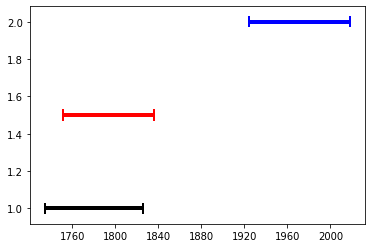

In [91]:
start_col = "birth_year"
end_col = "death_year"

p1_start = dtconv(df.loc[1][start_col])
p1_end = dtconv(df.loc[1][end_col])
p2_start = dtconv(df.loc[3][start_col])
p2_end = dtconv(df.loc[3][end_col])



timelines(1, p1_start, p1_end, 'k')
timelines(1.5, p2_start, p2_end, 'r')

ps, pe = get_start_end(40)
timelines(2, ps, pe, 'blue')


#Setup the plot
ax = plt.gca()
ax.xaxis_date()
myFmt = DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)



In [92]:


def get_dt_start_end(df, rowNumber):
    
    dts = pd.to_datetime(df.loc[rowNumber][start_col])
    dte = pd.to_datetime(df.loc[rowNumber][end_col])
    print(dts, dte)
#    dt_start = dtconv(df.loc[rowNumber][start_col])
#     dt_end = dtconv(df.loc[rowNumber][end_col])
    return(dts, dte)




In [5]:
df_main = pd.read_csv('data/df_main.csv')

df_main.columns

Index(['active_end', 'active_start', 'countryName', 'details', 'domain',
       'end_date', 'industry', 'name', 'occupation', 'record_type',
       'start_date'],
      dtype='object')

In [114]:
start_col = "start_date"
end_col = "end_date"
y_poi = 2
numP=3


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#STUB
def get_comtemporaries(ploc):
    max_num = df_main.shape[0]

    done = 0
    while not done:
        a = random.randint(0, max_num-1)
        b = random.randint(0, max_num-1)
        if(a != b):
            done = 1
    return([a, b])

def get_poi_start_end(pLoc):
    p_start = df_main.loc[pLoc][start_col]
    p_end = df_main.loc[pLoc][end_col]
    return(p_start, p_end);


def get_active_start_end(pLoc):
    if df_main['record_type'][pLoc] == 'Active_SE':
        p_start = df_main.loc[pLoc]['active_start']
        p_end = df_main.loc[pLoc]['active_end']
        return(p_start, p_end);
    return NaT, NaT


#Plot function
def timelines(y, yrstart, yrstop, color='b', lw=4):
    """Plot timelines at y from yrstart to yrstop with given color."""   
    plt.hlines(y, yrstart, yrstop, color, lw=lw)
    plt.vlines(yrstart, y+0.03, y-0.03, color, lw=2)
    plt.vlines(yrstop, y+0.03, y-0.03, color, lw=2)

def single_poi_plot(df_main, ploc):
    
    #Setup the plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = plt.gca()
    ax.xaxis_date()
    myFmt = DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)
    
    text_style = dict(size=14, color='black')

    ps, pe = get_poi_start_end(ploc)
    print(ps, type(ps))
    
    
    
    #PLOTTING POI 
    timelines(y_poi, ps, pe, 'blue', lw=8)
    ax.text(ps, y_poi+0.2, df_main['name'][ploc], ha='left', **text_style)
    
    if(df_main['record_type'][ploc] == 'Active_SE'):
        pas, pae = get_active_start_end(ploc)
        timelines(y_poi, pas, pae, 'red', lw=10)
    
    
    #PLOTTING CONTEMPORARIES 
    contemporaries = get_comtemporaries(ploc)
    for y_idx, c in enumerate(contemporaries):
        ps, pe = get_poi_start_end(c)
        yLevel = y_poi + y_idx + 1
        timelines(yLevel, ps, pe, 'black')
        ax.text(ps, yLevel+0.1, df_main['name'][c], ha='left', **text_style)

    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_ylim(0, numP+3)
    

    draw_vertical_gridlines(df_main, ploc)
    
def draw_vertical_gridlines(df_main, ploc):
        
    
    dts, dte = get_dt_start_end(df_main, ploc)
    
    print(dts.year, dte.year)
    earliest_vline = round((dts.year - 50)/100) *100
    last_vline = round((dte.year + 50)/100) * 100
    #print('early', earliest_vline, 'last', last_vline)
    
    for t in range(earliest_vline, last_vline+1, 100):
        plt.axvline(dt.datetime(t, 1, 1))
        

1822-01-01 00:00:00 <class 'str'>
1822-01-01 00:00:00 1893-01-01 00:00:00
1822 1893
early 1800 last 1900


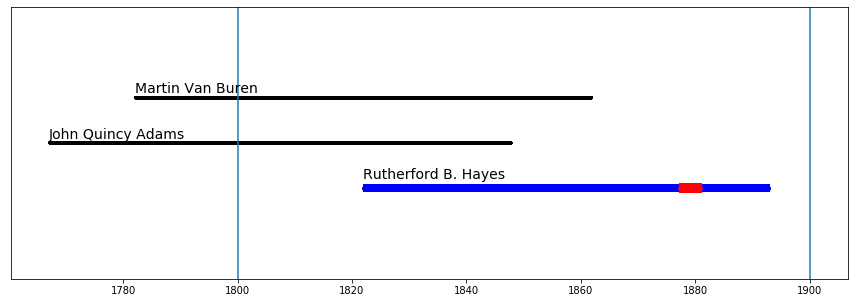

In [123]:
pLoc = random.randint(0, df_main.shape[0])
single_poi_plot(df_main, pLoc)


# Single Person of Interest

1. Add titles to plots
1.  Pick contemporaries
    Get maximum overlap in terms of years alive/years active.
2. Get 10 years on either side padding. (10 configurable)
5. Center the POI timeline
2. Add triangles to denote start/end years and label them



DONE
2. Add some vertical guidelines
1. A special color and thickness for POI
7. Pick two random contemporaries.
4. Annotation
6. Active Years. (Another special color)


In [22]:
    
#Plot ok tl black    
timelines(y[is_ok], start[is_ok], stop[is_ok], 'k')
#Plot fail tl red
timelines(y[not_ok], start[not_ok], stop[not_ok], 'r')

#Setup the plot
ax = plt.gca()
ax.xaxis_date()
myFmt = DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(SecondLocator(interval=20)) # used to be SecondLocator(0, interval=20)

#To adjust the xlimits a timedelta is needed.
delta = (stop.max() - start.min())/10

plt.yticks(y[unique_idx], captions)
plt.ylim(0,1)
plt.xlim(start.min()-delta, stop.max()+delta)
plt.xlabel('Time')
plt.show()

NameError: name 'y' is not defined

In [17]:
df

,name,BY,Summ,Summ_DY,Wikidata,WkData_DY,Struct_DY
0,Edmund Burke,1729,1797,1797.0,1797,1797.0,+1797
1,Eric Clapton,1945,born 30 March 1945,NaN,death_date not found in infobox,NaN,
2,Epicurus,-341,270,270.0,NaN,NaN,NaN
3,El Cid,1040,,NaN,NaN,NaN,+1098
4,Ethelred the Unready,968,,NaN,NaN,NaN,


# Variations to Code

1. Pick 2 random contemporaries